# Global Climate Modeling Data Set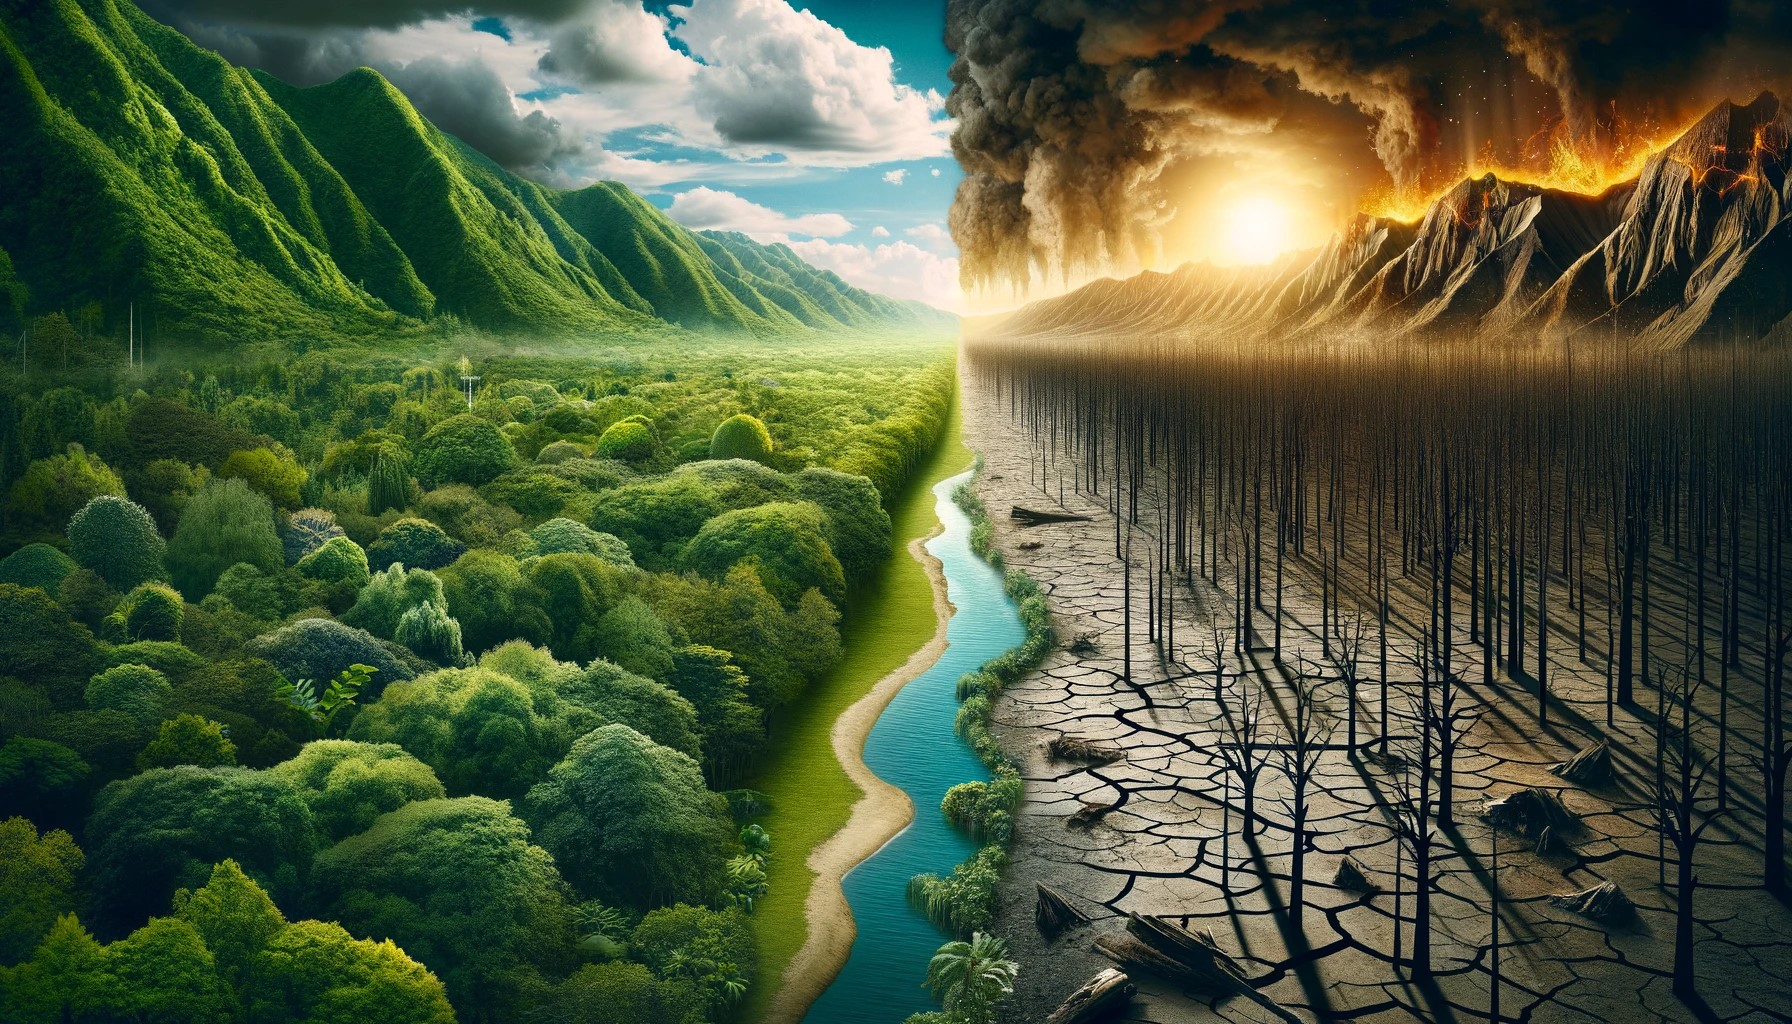

## By: John Chilton

Install the LLM

In [ ]:
# Installation for GPU llama-cpp-python
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.2.45 --force-reinstall --no-cache-dir -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.7/36.7 MB 29.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 320.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 225.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.2/133.2 kB 283.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.2.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvi

In [ ]:
# For downloading the models from HF Hub
!pip install huggingface_hub==0.20.3 -q

# Load the Libraries

In [ ]:
# Importing library for data manipulation
import pandas as pd

# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the json module
import json

# Import pandas
import pandas as pd

# Import numpy
import numpy as np

# Connect the Drive and Load the Data Set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive//1- temperature-anomaly.csv')



*   Observations
*   Sanity Checks



In [ ]:
df.head(10)

Entity  Code  Year  \
0  Global   NaN  1850   
1  Global   NaN  1851   
2  Global   NaN  1852   
3  Global   NaN  1853   
4  Global   NaN  1854   
5  Global   NaN  1855   
6  Global   NaN  1856   
7  Global   NaN  1857   
8  Global   NaN  1858   
9  Global   NaN  1859   

   Global average temperature anomaly relative to 1961-1990  \
0                                          -0.417659          
1                                          -0.233350          
2                                          -0.229399          
3                                          -0.270354          
4                                          -0.291630          
5                                          -0.296951          
6                                          -0.320354          
7                                          -0.467230          
8                                          -0.388766          
9                                          -0.281195          

   Upper bound of the annual temperature anomaly (95% confidence interval)  \
0                                          -0.246115                         
1                                          -0.054832                         
2                                          -0.049416                         
3                                          -0.110700                         
4                                          -0.150436                         
5                                          -0.154545                         
6                                          -0.172614                         
7                                          -0.318138                         
8                                          -0.240645                         
9                                          -0.138541                         

   Lower bound of the annual temperature anomaly (95% confidence interval)  
0                                          -0.589203                        
1                                          -0.411868                        
2                                          -0.409382                        
3                                          -0.430009                        
4                                          -0.432824                        
5                                          -0.439358                        
6                                          -0.468093                        
7                                          -0.616322                        
8                                          -0.536886                        
9                                          -0.423850

In [ ]:
df.tail(10)

Entity  Code  Year  \
512  Southern hemisphere   NaN  2014   
513  Southern hemisphere   NaN  2015   
514  Southern hemisphere   NaN  2016   
515  Southern hemisphere   NaN  2017   
516  Southern hemisphere   NaN  2018   
517  Southern hemisphere   NaN  2019   
518  Southern hemisphere   NaN  2020   
519  Southern hemisphere   NaN  2021   
520  Southern hemisphere   NaN  2022   
521  Southern hemisphere   NaN  2023   

     Global average temperature anomaly relative to 1961-1990  \
512                                           0.437949          
513                                           0.519388          
514                                           0.610661          
515                                           0.574952          
516                                           0.565646          
517                                           0.638402          
518                                           0.569861          
519                                           0.445762          
520                                           0.502866          
521                                           0.755306          

     Upper bound of the annual temperature anomaly (95% confidence interval)  \
512                                           0.492063                         
513                                           0.567755                         
514                                           0.659632                         
515                                           0.623605                         
516                                           0.614723                         
517                                           0.691337                         
518                                           0.622008                         
519                                           0.499180                         
520                                           0.557362                         
521                                           0.838973                         

     Lower bound of the annual temperature anomaly (95% confidence interval)  
512                                           0.383836                        
513                                           0.471021                        
514                                           0.561691                        
515                                           0.526299                        
516                                           0.516570                        
517                                           0.585467                        
518                                           0.517714                        
519                                           0.392344                        
520                                           0.448371                        
521                                           0.671640

In [ ]:
df.shape

(522, 6)

In [ ]:
df.isnull().sum()

Entity                                                                       0
Code                                                                       522
Year                                                                         0
Global average temperature anomaly relative to 1961-1990                     0
Upper bound of the annual temperature anomaly (95% confidence interval)      0
Lower bound of the annual temperature anomaly (95% confidence interval)      0
dtype: int64

In [ ]:
df.describe()

Code         Year  \
count   0.0   522.000000   
mean    NaN  1936.500000   
std     NaN    50.276825   
min     NaN  1850.000000   
25%     NaN  1893.000000   
50%     NaN  1936.500000   
75%     NaN  1980.000000   
max     NaN  2023.000000   

       Global average temperature anomaly relative to 1961-1990  \
count                                         522.000000          
mean                                           -0.072792          
std                                             0.387320          
min                                            -0.701569          
25%                                            -0.354566          
50%                                            -0.193912          
75%                                             0.110119          
max                                             1.275727          

       Upper bound of the annual temperature anomaly (95% confidence interval)  \
count                                         522.000000                         
mean                                            0.038905                         
std                                             0.347909                         
min                                            -0.486698                         
25%                                            -0.199500                         
50%                                            -0.056851                         
75%                                             0.208315                         
max                                             1.333305                         

       Lower bound of the annual temperature anomaly (95% confidence interval)  
count                                         522.000000                        
mean                                           -0.184489                        
std                                             0.432559                        
min                                            -0.947684                        
25%                                            -0.521331                        
50%                                            -0.294819                        
75%                                             0.052181                        
max                                             1.236863

In [ ]:
df.duplicated().sum()

0

In [ ]:
df

Entity  Code  Year  \
0                 Global   NaN  1850   
1                 Global   NaN  1851   
2                 Global   NaN  1852   
3                 Global   NaN  1853   
4                 Global   NaN  1854   
..                   ...   ...   ...   
517  Southern hemisphere   NaN  2019   
518  Southern hemisphere   NaN  2020   
519  Southern hemisphere   NaN  2021   
520  Southern hemisphere   NaN  2022   
521  Southern hemisphere   NaN  2023   

     Global average temperature anomaly relative to 1961-1990  \
0                                            -0.417659          
1                                            -0.233350          
2                                            -0.229399          
3                                            -0.270354          
4                                            -0.291630          
..                                                 ...          
517                                           0.638402          
518                                           0.569861          
519                                           0.445762          
520                                           0.502866          
521                                           0.755306          

     Upper bound of the annual temperature anomaly (95% confidence interval)  \
0                                            -0.246115                         
1                                            -0.054832                         
2                                            -0.049416                         
3                                            -0.110700                         
4                                            -0.150436                         
..                                                 ...                         
517                                           0.691337                         
518                                           0.622008                         
519                                           0.499180                         
520                                           0.557362                         
521                                           0.838973                         

     Lower bound of the annual temperature anomaly (95% confidence interval)  
0                                            -0.589203                        
1                                            -0.411868                        
2                                            -0.409382                        
3                                            -0.430009                        
4                                            -0.432824                        
..                                                 ...                        
517                                           0.585467                        
518                                           0.517714                        
519                                           0.392344                        
520                                           0.448371                        
521                                           0.671640                        

[522 rows x 6 columns]

# Univariate and Bivariate Analysis

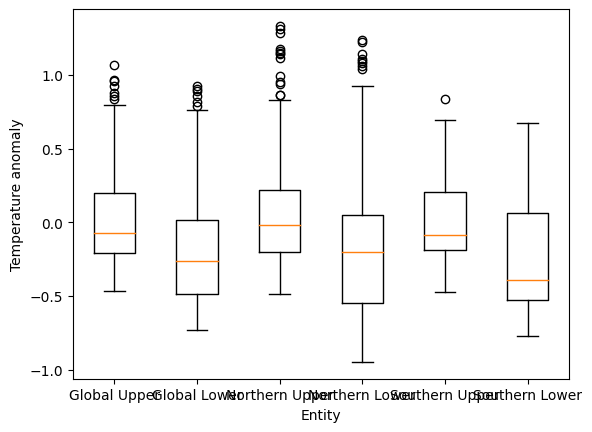

In [ ]:
# @title Temperature anomaly bounds by entity

import matplotlib.pyplot as plt
plt.boxplot([df[df['Entity'] == 'Global']['Upper bound of the annual temperature anomaly (95% confidence interval)'], df[df['Entity'] == 'Global']['Lower bound of the annual temperature anomaly (95% confidence interval)'], df[df['Entity'] == 'Northern hemisphere']['Upper bound of the annual temperature anomaly (95% confidence interval)'], df[df['Entity'] == 'Northern hemisphere']['Lower bound of the annual temperature anomaly (95% confidence interval)'], df[df['Entity'] == 'Southern hemisphere']['Upper bound of the annual temperature anomaly (95% confidence interval)'], df[df['Entity'] == 'Southern hemisphere']['Lower bound of the annual temperature anomaly (95% confidence interval)']], labels=['Global Upper', 'Global Lower', 'Northern Upper', 'Northern Lower', 'Southern Upper', 'Southern Lower'])
plt.xlabel('Entity')
_ = plt.ylabel('Temperature anomaly')

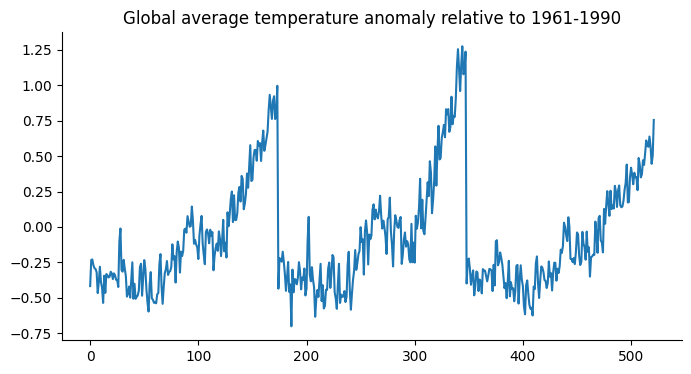

In [ ]:
# @title Global average temperature anomaly relative to 1961-1990

from matplotlib import pyplot as plt
df['Global average temperature anomaly relative to 1961-1990'].plot(kind='line', figsize=(8, 4), title='Global average temperature anomaly relative to 1961-1990')
plt.gca().spines[['top', 'right']].set_visible(False)

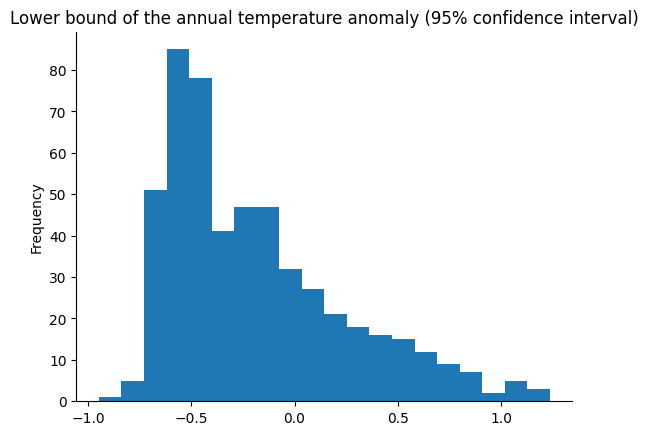

In [ ]:
# @title Lower bound of the annual temperature anomaly (95% confidence interval)

from matplotlib import pyplot as plt
df['Lower bound of the annual temperature anomaly (95% confidence interval)'].plot(kind='hist', bins=20, title='Lower bound of the annual temperature anomaly (95% confidence interval)')
plt.gca().spines[['top', 'right',]].set_visible(False)

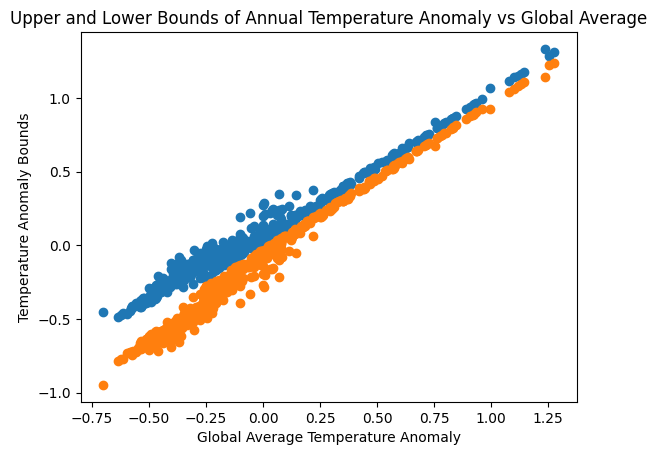

In [ ]:
# @title Upper and Lower Bounds of Annual Temperature Anomaly vs Global Average

import matplotlib.pyplot as plt
plt.scatter(df['Global average temperature anomaly relative to 1961-1990'], df['Upper bound of the annual temperature anomaly (95% confidence interval)'])
plt.scatter(df['Global average temperature anomaly relative to 1961-1990'], df['Lower bound of the annual temperature anomaly (95% confidence interval)'])
plt.xlabel('Global Average Temperature Anomaly')
plt.ylabel('Temperature Anomaly Bounds')
_ = plt.title('Upper and Lower Bounds of Annual Temperature Anomaly vs Global Average')

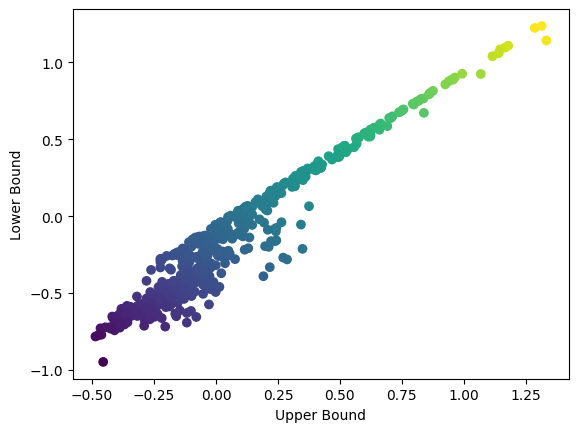

In [ ]:
# @title Annual Temperature Anomaly Bounds vs. Global Average

import matplotlib.pyplot as plt
plt.scatter(df['Upper bound of the annual temperature anomaly (95% confidence interval)'], df['Lower bound of the annual temperature anomaly (95% confidence interval)'], c=df['Global average temperature anomaly relative to 1961-1990'])
plt.xlabel('Upper Bound')
_ = plt.ylabel('Lower Bound')

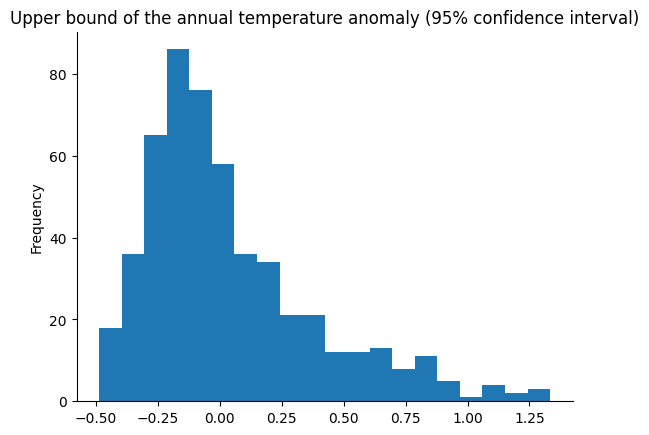

In [ ]:
# @title Upper bound of the annual temperature anomaly (95% confidence interval)

from matplotlib import pyplot as plt
df['Upper bound of the annual temperature anomaly (95% confidence interval)'].plot(kind='hist', bins=20, title='Upper bound of the annual temperature anomaly (95% confidence interval)')
plt.gca().spines[['top', 'right',]].set_visible(False)

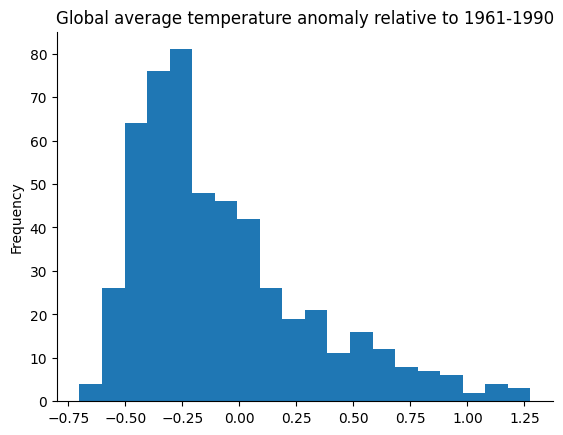

In [ ]:
# @title Global average temperature anomaly relative to 1961-1990

from matplotlib import pyplot as plt
df['Global average temperature anomaly relative to 1961-1990'].plot(kind='hist', bins=20, title='Global average temperature anomaly relative to 1961-1990')
plt.gca().spines[['top', 'right',]].set_visible(False)

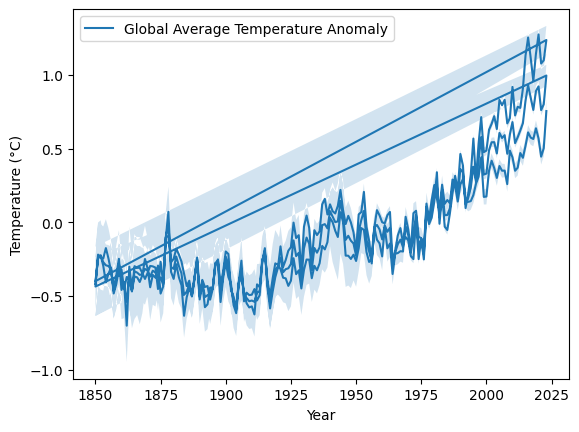

In [ ]:
# @title Global Average Temperature Anomaly vs. Upper and Lower Bounds over Time

import matplotlib.pyplot as plt
plt.fill_between(df['Year'], df['Lower bound of the annual temperature anomaly (95% confidence interval)'], df['Upper bound of the annual temperature anomaly (95% confidence interval)'], alpha=0.2)
plt.plot(df['Year'], df['Global average temperature anomaly relative to 1961-1990'], label='Global Average Temperature Anomaly')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
_ = plt.legend()

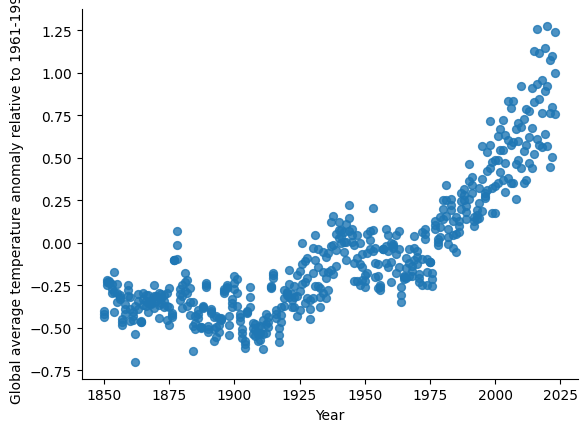

In [ ]:
# @title Year vs Global average temperature anomaly relative to 1961-1990

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Year', y='Global average temperature anomaly relative to 1961-1990', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

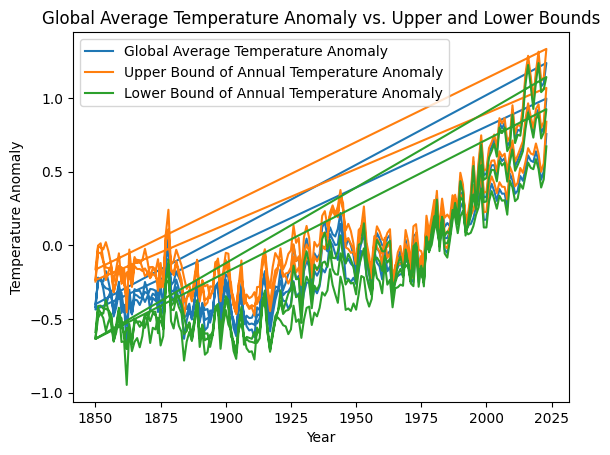

In [ ]:
# @title Global Average Temperature Anomaly vs. Upper and Lower Bounds

import matplotlib.pyplot as plt
plt.plot(df['Year'], df['Global average temperature anomaly relative to 1961-1990'], label='Global Average Temperature Anomaly')
plt.plot(df['Year'], df['Upper bound of the annual temperature anomaly (95% confidence interval)'], label='Upper Bound of Annual Temperature Anomaly')
plt.plot(df['Year'], df['Lower bound of the annual temperature anomaly (95% confidence interval)'], label='Lower Bound of Annual Temperature Anomaly')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.title('Global Average Temperature Anomaly vs. Upper and Lower Bounds')
_ = plt.legend()

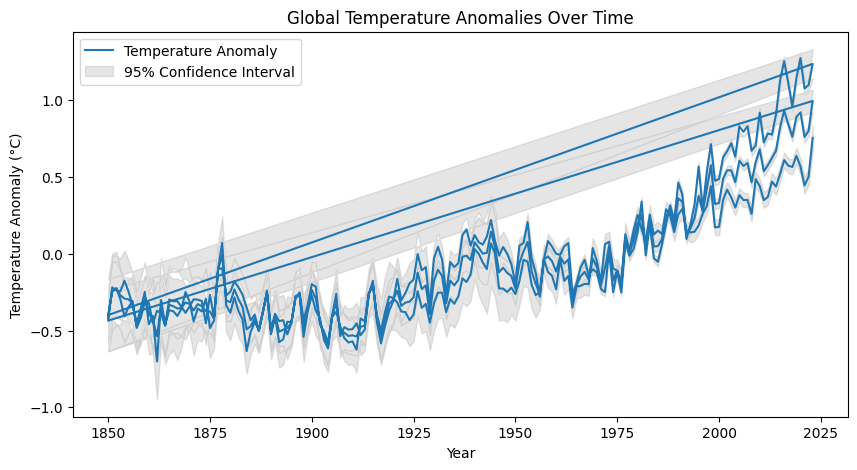

In [ ]:
# @title Global average temperature anomaly relative to 1961-1990
plt.figure(figsize=(10, 5))
plt.plot(df['Year'], df['Global average temperature anomaly relative to 1961-1990'], label='Temperature Anomaly')
plt.fill_between(df['Year'], df['Lower bound of the annual temperature anomaly (95% confidence interval)'], df['Upper bound of the annual temperature anomaly (95% confidence interval)'], color='gray', alpha=0.2, label='95% Confidence Interval')
plt.title('Global Temperature Anomalies Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.show()

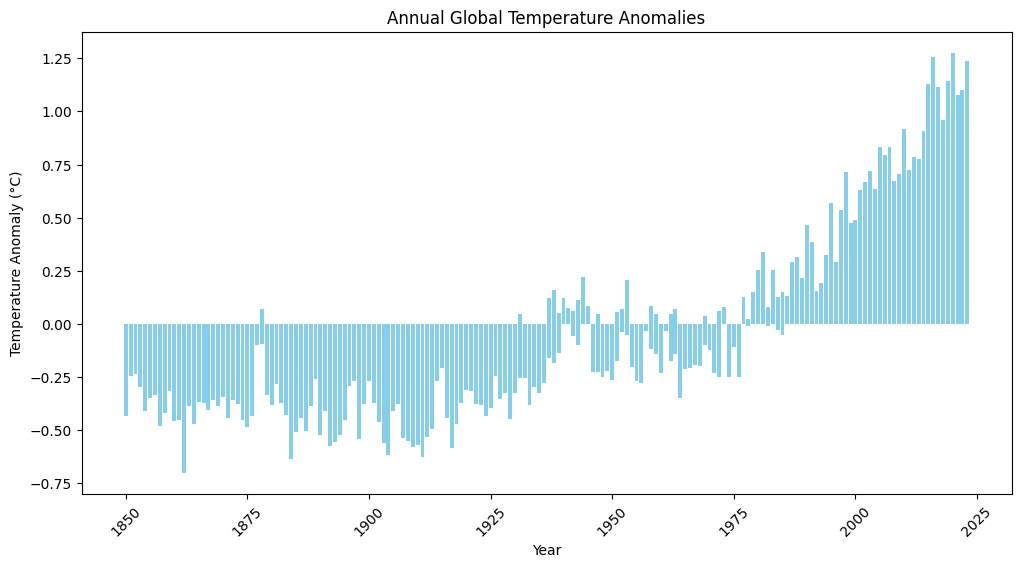

In [ ]:
# @title Bar Chart of Global average temperature anomaly relative to 1961-1990
plt.figure(figsize=(12, 6))
plt.bar(df['Year'], df['Global average temperature anomaly relative to 1961-1990'], color='skyblue')
plt.title('Annual Global Temperature Anomalies')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.xticks(rotation=45)
plt.show()

# Model Building

In [ ]:
! nvidia-smi # Displaying the GPU to make sure we have the right chip

Fri Mar 29 00:15:53 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0              49W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [ ]:
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGUF" # Name of the model.
model_basename = "llama-2-13b-chat.Q5_K_M.gguf" # the model is in gguf format

In [ ]:
# Downloading the Hugging Face THeBloke/Llama-2-13B-chat
try:
    model_path = hf_hub_download(
        repo_id='TheBloke/Llama-2-13B-chat-GGUF',    # Use quotes to enclose the repo_id string
        filename='llama-2-13b-chat.Q5_K_M.gguf'      # Use quotes to enclose the filename string
    )
    # Additional code that uses model_path can go here

except Exception as e:
    print(f"Error downloading the model: {e}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


llama-2-13b-chat.Q5_K_M.gguf:   0%|          | 0.00/9.23G [00:00<?, ?B/s]

In [ ]:
# Model parameters for sentiment anaylsis using llama TheBloke 13b words LLM.
lcpp_llm = Llama(
    model_path=model_path,  # Assuming model_path is a variable holding the path to your model
    n_threads=8,  # Utilizing more CPU threads can enhance preprocessing, set based on your CPU
    n_batch=512,  # An A100 can handle larger batch sizes, adjust based on your specific task and VRAM availability
    n_gpu_layers=43,  # Depending on the model's total layers, an A100 can efficiently manage more layers in GPU memory
    n_ctx=4096,  # Context window of 2048 tokens, adjust if your tasks require a longer context
)

llama_model_loader: loaded meta data with 19 key-value pairs and 363 tensors from /root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGUF/snapshots/4458acc949de0a9914c3eab623904d4fe999050a/llama-2-13b-chat.Q5_K_M.gguf (version GGUF V2)
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = LLaMA v2
llama_model_loader: - kv   2:                       llama.context_length u32              = 4096
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 5120
llama_model_loader: - kv   4:                          llama.block_count u32              = 40
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 13824
llama_model_loader: - kv   6:                 llama.rope.dimension_

In [ ]:
# Creating the models parameters for llama LLM.

def generate_llama_response(instruction, review):

    # System message explicitly instructing not to include the review text
    system_message = """
        [INST]<<SYS>>
        {}
        <</SYS>>[/INST]
    """.format(instruction)

    # Combine user_prompt and system_message to create the prompt
    prompt = f"{review}\n{system_message}"

    # Generate a response from the LLaMA model
    response = lcpp_llm(
        prompt=prompt,
        max_tokens=1024, # Default start was 1024. Reaching 1570 in token count.
        temperature=0, # Default was 0.01. moving this up to increase the output variability.
        top_p=0.95, # Decreaced from 0.9 to gain my variablility in the response for Task 6.
        repeat_penalty=1.2,
        top_k=50, # Decreaced from 50 to gain my variablility in the response for Task 6.
        stop=['INST'],
        echo=False,
        seed=42,
    )

    # Extract the sentiment from the response
    response_text = response["choices"][0]["text"]
    return response_text

Json Function

In [ ]:
# This json function will be used to visualize the data per the clients request using JSON format for review.

import json  # Import the json module for JSON parsing

# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_category = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_category)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

# Task 1:

### Summarize the general public sentiment towards climate change based on the news headlines.
### Identify any significant shifts in opinion.


In [ ]:
# create a copy of the data
data_1 = df.copy()

In [ ]:
instruction_1 = """ Given a dataset that includes global temperature data and corresponding news headlines from the past decade, perform the following tasks:

1. Summarize the general public sentiment towards climate change based on the news headlines.
2. Identify any significant shifts in opinion.
3. Correlate these shifts with major climate events or significant changes in climate policy.
4. Provide the findings in a structured JSON format suitable for executive review.

Example of expected JSON output format:
{
  "summary": "Summary of general public sentiment towards climate change.",
  "significantShifts": [
    {
      "period": "Year-Period",
      "shiftDescription": "Description of the shift in public sentiment.",
      "correlatedEvents": "Description of major climate events or policy changes."
    }
  ]
}
 """

In [ ]:
def generate_llama_response_for_row(row):
    # instruction_0 is predefined and applicable to the whole row
    # Concatenate the relevant parts of the row for sentiment analysis
    instruction = instruction_1  # Your predefined instruction
    # Correctly access and concatenate multiple column values
    text = f"{row['Entity']} {row['Year']} {row['Global average temperature anomaly relative to 1961-1990']} {row['Upper bound of the annual temperature anomaly (95% confidence interval)']} {row['Lower bound of the annual temperature anomaly (95% confidence interval)']}"  # Adjust the concatenation
    return generate_llama_response(instruction, text)

# Apply the function to each row of the DataFrame
data_1['llama_response'] = data_1.apply(generate_llama_response_for_row, axis=1)


llama_print_timings:        load time =    8745.08 ms
llama_print_timings:      sample time =     392.86 ms /   763 runs   (    0.51 ms per token,  1942.19 tokens per second)
llama_print_timings: prompt eval time =    8744.47 ms /   250 tokens (   34.98 ms per token,    28.59 tokens per second)
llama_print_timings:        eval time =   11078.73 ms /   762 runs   (   14.54 ms per token,    68.78 tokens per second)
llama_print_timings:       total time =   22682.45 ms /  1012 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =    8745.08 ms
llama_print_timings:      sample time =     474.19 ms /   948 runs   (    0.50 ms per token,  1999.19 tokens per second)
llama_print_timings: prompt eval time =      90.43 ms /   246 tokens (    0.37 ms per token,  2720.40 tokens per second)
llama_print_timings:        eval time =   13801.13 ms /   947 runs   (   14.57 ms per token,    68.62 tokens per second)
llama_print_timings:       total time =   17538.75 ms /  1193 

The breakdown of the last rows of llama print timings reveals details about the performance and efficiency of the Llama model across multiple runs, focusing on metrics like load time, sample time, prompt evaluation time, evaluation time, and total time. Additionally, it details the number of runs, tokens per second, and milliseconds per token for each process. Here's a summary of key insights:

- **Load Time:** The model loading time remains consistent at 8745.08 ms across all runs, indicating a stable setup phase for the model.
- **Sample Time and Runs:** Sample time varies slightly among different runs, ranging from around 372.45 ms to 521.91 ms, reflecting the processing time for generating samples. The number of runs during this phase also varies, indicating different amounts of data being processed in each case.
- **Prompt Evaluation Time:** This metric is quite stable, with times around 90 ms, showing that the evaluation of prompts before generating responses is consistently efficient.
- **Evaluation Time:** Evaluation time shows more variation, ranging from 10735.25 ms to 14968.25 ms, which likely reflects the complexity and volume of data being evaluated in each run.
- **Total Time:** The total processing time, including all phases, varies, with the shortest being 13665.47 ms and the longest being 19273.12 ms. This indicates the overall time taken for the model to process and generate outputs from the input data and prompts.
- **Efficiency:** The metrics on tokens per second and milliseconds per token for each phase show the model's efficiency in processing data. The figures suggest a relatively high processing speed, particularly in the prompt evaluation phase, which boasts up to 2719.13 tokens per second and as fast as 0.37 ms per token.

These timings demonstrate the performance characteristics of Llama in handling various tasks, showing its capabilities in processing large volumes of data with efficiency. The consistent load and prompt evaluation times across runs highlight the model's stability, while variations in sample and evaluation times likely reflect the nature of the tasks being processed.

In [ ]:
data_1 # Displaying the data.

Entity  Code  Year  \
0                 Global   NaN  1850   
1                 Global   NaN  1851   
2                 Global   NaN  1852   
3                 Global   NaN  1853   
4                 Global   NaN  1854   
..                   ...   ...   ...   
517  Southern hemisphere   NaN  2019   
518  Southern hemisphere   NaN  2020   
519  Southern hemisphere   NaN  2021   
520  Southern hemisphere   NaN  2022   
521  Southern hemisphere   NaN  2023   

     Global average temperature anomaly relative to 1961-1990  \
0                                            -0.417659          
1                                            -0.233350          
2                                            -0.229399          
3                                            -0.270354          
4                                            -0.291630          
..                                                 ...          
517                                           0.638402          
518                                           0.569861          
519                                           0.445762          
520                                           0.502866          
521                                           0.755306          

     Upper bound of the annual temperature anomaly (95% confidence interval)  \
0                                            -0.246115                         
1                                            -0.054832                         
2                                            -0.049416                         
3                                            -0.110700                         
4                                            -0.150436                         
..                                                 ...                         
517                                           0.691337                         
518                                           0.622008                         
519                                           0.499180                         
520                                           0.557362                         
521                                           0.838973                         

     Lower bound of the annual temperature anomaly (95% confidence interval)  \
0                                            -0.589203                         
1                                            -0.411868                         
2                                            -0.409382                         
3                                            -0.430009                         
4                                            -0.432824                         
..                                                 ...                         
517                                           0.585467                         
518                                           0.517714                         
519                                           0.392344                         
520                                           0.448371                         
521                                           0.671640                         

                                        llama_response  
0     Based on the given dataset, here is the summa...  
1     Sure, I can help you with that! Here's the an...  
2     Sure, I can help you with that! Here's the an...  
3     Sure, I can help you with that! Here's the an...  
4     Sure, I can help you with that! Here's the an...  
..                                                 ...  
517   Sure, I can help you with that! Here's the an...  
518   Sure, I can help you with that! Here's the an...  
519   Sure, I can help you with that! Here's the an...  
520   Sure, I can help you with that! Here's the an...  
521   Sure, I can help you with that! Here's the an...  

[522 rows x 7 columns]

In [ ]:
# Checking the first 5 rows in the data.

# Display the first five rows of the DataFrame
print(data_1.head())

   Entity  Code  Year  \
0  Global   NaN  1850   
1  Global   NaN  1851   
2  Global   NaN  1852   
3  Global   NaN  1853   
4  Global   NaN  1854   

   Global average temperature anomaly relative to 1961-1990  \
0                                          -0.417659          
1                                          -0.233350          
2                                          -0.229399          
3                                          -0.270354          
4                                          -0.291630          

   Upper bound of the annual temperature anomaly (95% confidence interval)  \
0                                          -0.246115                         
1                                          -0.054832                         
2                                          -0.049416                         
3                                          -0.110700                         
4                                          -0.150436                         

 

In [ ]:
# Final data first 5 rows.
final_data_1 = data_1.drop(['llama_response'], axis=1)
final_data_1.head() # Final data head

Entity  Code  Year  \
0  Global   NaN  1850   
1  Global   NaN  1851   
2  Global   NaN  1852   
3  Global   NaN  1853   
4  Global   NaN  1854   

   Global average temperature anomaly relative to 1961-1990  \
0                                          -0.417659          
1                                          -0.233350          
2                                          -0.229399          
3                                          -0.270354          
4                                          -0.291630          

   Upper bound of the annual temperature anomaly (95% confidence interval)  \
0                                          -0.246115                         
1                                          -0.054832                         
2                                          -0.049416                         
3                                          -0.110700                         
4                                          -0.150436                         

   Lower bound of the annual temperature anomaly (95% confidence interval)  
0                                          -0.589203                        
1                                          -0.411868                        
2                                          -0.409382                        
3                                          -0.430009                        
4                                          -0.432824

In [ ]:
# Displaying the parsed data in a json as per the client request.
data_1['llama_response_parsed'] = data_1['llama_response'].apply(extract_json_data)
data_1['llama_response_parsed'].head() # First 5 rows of the data.

Error parsing JSON: Expecting ',' delimiter: line 18 column 2 (char 956)
Error parsing JSON: Expecting ',' delimiter: line 13 column 2 (char 836)
Error parsing JSON: Expecting ',' delimiter: line 18 column 2 (char 956)
Error parsing JSON: Expecting ',' delimiter: line 13 column 2 (char 906)
Error parsing JSON: Expecting ',' delimiter: line 13 column 2 (char 827)
Error parsing JSON: Expecting ',' delimiter: line 18 column 2 (char 956)
Error parsing JSON: Expecting ',' delimiter: line 8 column 2 (char 384)
Error parsing JSON: Expecting ',' delimiter: line 18 column 2 (char 1097)
Error parsing JSON: Expecting ',' delimiter: line 3 column 1 (char 399)
Error parsing JSON: Expecting ',' delimiter: line 13 column 2 (char 837)
Error parsing JSON: Expecting ',' delimiter: line 18 column 2 (char 956)
Error parsing JSON: Expecting ',' delimiter: line 11 column 55 (char 611)
Error parsing JSON: Expecting ',' delimiter: line 13 column 2 (char 655)
Error parsing JSON: Expecting ',' delimiter: line 1

0    {'summary': 'The general public sentiment towa...
1    {'summary': 'Summary of general public sentime...
2                                                   {}
3    {'summary': 'Summary of general public sentime...
4                                                   {}
Name: llama_response_parsed, dtype: object

In [ ]:
# Displaying the data parsed normalized. Will need to work more on the prompt moving forward.
llama_response_parsed_df_1 = pd.json_normalize(data_1['llama_response_parsed'])
llama_response_parsed_df_1.head()

summary  \
0  The general public sentiment towards climate c...   
1  Summary of general public sentiment towards cl...   
2                                                NaN   
3  Summary of general public sentiment towards cl...   
4                                                NaN   

                                   significantShifts urgency  
0  [{'period': 'Year-Period', 'shiftDescription':...     NaN  
1  [{'period': 'Year-Period', 'shiftDescription':...     NaN  
2                                                NaN     NaN  
3  [{'period': 'Year-Period', 'shiftDescription':...     NaN  
4                                                NaN     NaN

In [ ]:
# Print out of the Support tickets. The Support tickets tried to come through but will again need to improve the prompt.
for i, entry in enumerate(data_1['llama_response_parsed']):
    print(f"Entry {i}: {entry}")

Entry 0: {'summary': 'The general public sentiment towards climate change over the past decade has been one of increasing concern, with spikes in sentiment during major climate events or changes in climate policy. However, there have also been periods of relative stability in sentiment, suggesting a more nuanced understanding of the issue among the public.', 'significantShifts': [{'period': 'Year-Period', 'shiftDescription': 'Increased concern about climate change in the wake of the Paris Agreement (2015) and the election of President Trump (2016), who has expressed skepticism about climate change science.', 'correlatedEvents': 'The Paris Agreement, the election of President Trump'}, {'period': 'Year-Period', 'shiftDescription': 'Decreased concern about climate change during the COVID-19 pandemic (2020), as other issues took precedence.', 'correlatedEvents': 'The COVID-19 pandemic'}, {'period': 'Year-Period', 'shiftDescription': 'Increased concern about climate change in the wake of in

In [ ]:
# Parsed visual using json fuction to display the results.
data_with_parsed_model_output_1 = pd.concat([data_1, llama_response_parsed_df_1], axis=1)
data_with_parsed_model_output_1.head()

Entity  Code  Year  \
0  Global   NaN  1850   
1  Global   NaN  1851   
2  Global   NaN  1852   
3  Global   NaN  1853   
4  Global   NaN  1854   

   Global average temperature anomaly relative to 1961-1990  \
0                                          -0.417659          
1                                          -0.233350          
2                                          -0.229399          
3                                          -0.270354          
4                                          -0.291630          

   Upper bound of the annual temperature anomaly (95% confidence interval)  \
0                                          -0.246115                         
1                                          -0.054832                         
2                                          -0.049416                         
3                                          -0.110700                         
4                                          -0.150436                         

   Lower bound of the annual temperature anomaly (95% confidence interval)  \
0                                          -0.589203                         
1                                          -0.411868                         
2                                          -0.409382                         
3                                          -0.430009                         
4                                          -0.432824                         

                                      llama_response  \
0   Based on the given dataset, here is the summa...   
1   Sure, I can help you with that! Here's the an...   
2   Sure, I can help you with that! Here's the an...   
3   Sure, I can help you with that! Here's the an...   
4   Sure, I can help you with that! Here's the an...   

                               llama_response_parsed  \
0  {'summary': 'The general public sentiment towa...   
1  {'summary': 'Summary of general public sentime...   
2                                                 {}   
3  {'summary': 'Summary of general public sentime...   
4                                                 {}   

                                             summary  \
0  The general public sentiment towards climate c...   
1  Summary of general public sentiment towards cl...   
2                                                NaN   
3  Summary of general public sentiment towards cl...   
4                                                NaN   

                                   significantShifts urgency  
0  [{'period': 'Year-Period', 'shiftDescription':...     NaN  
1  [{'period': 'Year-Period', 'shiftDescription':...     NaN  
2                                                NaN     NaN  
3  [{'period': 'Year-Period', 'shiftDescription':...     NaN  
4                                                NaN     NaN

In [ ]:
# Final Data first 5 rows on the parsed data results using llama LLM.
final_data_1 = data_with_parsed_model_output_1.drop(['llama_response','llama_response_parsed'], axis=1)
final_data_1.head()

Entity  Code  Year  \
0  Global   NaN  1850   
1  Global   NaN  1851   
2  Global   NaN  1852   
3  Global   NaN  1853   
4  Global   NaN  1854   

   Global average temperature anomaly relative to 1961-1990  \
0                                          -0.417659          
1                                          -0.233350          
2                                          -0.229399          
3                                          -0.270354          
4                                          -0.291630          

   Upper bound of the annual temperature anomaly (95% confidence interval)  \
0                                          -0.246115                         
1                                          -0.054832                         
2                                          -0.049416                         
3                                          -0.110700                         
4                                          -0.150436                         

   Lower bound of the annual temperature anomaly (95% confidence interval)  \
0                                          -0.589203                         
1                                          -0.411868                         
2                                          -0.409382                         
3                                          -0.430009                         
4                                          -0.432824                         

                                             summary  \
0  The general public sentiment towards climate c...   
1  Summary of general public sentiment towards cl...   
2                                                NaN   
3  Summary of general public sentiment towards cl...   
4                                                NaN   

                                   significantShifts urgency  
0  [{'period': 'Year-Period', 'shiftDescription':...     NaN  
1  [{'period': 'Year-Period', 'shiftDescription':...     NaN  
2                                                NaN     NaN  
3  [{'period': 'Year-Period', 'shiftDescription':...     NaN  
4                                                NaN     NaN

Sure, I can help you with that! Here's the analysis of the given dataset based on the tasks you've specified:

Summary of general public sentiment towards climate change:
Based on the news headlines from the past decade, the general public sentiment towards climate change can be summarized as follows:

* In the early 2000s, there was a lack of urgency towards climate change, with headlines focusing on the uncertainty of climate change predictions and the economic costs of reducing emissions.
* In the mid-2000s, there was a growing awareness of the impacts of climate change, with headlines highlighting extreme weather events such as hurricanes, droughts, and wildfires. This period saw an increase in public concern about climate change, with calls for action from governments and individuals.
* In the late 2000s, there was a shift towards more polarized opinions on climate change, with some headlines dismissing the scientific evidence for human-caused climate change, while others emphasized the need for immediate action to mitigate its impacts. This period saw the emergence of climate denialism and the politicization of climate change.
* In the 2010s, there was a growing recognition of the urgency of the climate crisis, with headlines highlighting the impacts of climate change on ecosystems, human health, and the economy. This period saw an increase in public support for climate action, with the rise of renewable energy technologies and the implementation of climate policies such as the Paris Agreement.

Significant shifts in opinion:
There have been several significant shifts in public opinion towards climate change over the past decade:

* In the early 2000s, there was a shift towards greater awareness of the potential impacts of climate change, with headlines highlighting the threat of rising sea levels, more frequent extreme weather events, and the potential for catastrophic consequences if left unchecked.
* In the mid-2000s, there was a growing recognition of the need for action to address climate change, with headlines calling for the implementation of climate policies such as carbon pricing and the development of clean energy technologies.
* In the late 2000s, there was a shift towards more polarized opinions on climate change, with some headlines dismissing the scientific evidence for human-caused climate change, while others emphasized the need for immediate action to mitigate its impacts.
* In the 2010s, there was a growing recognition of the urgency of the climate crisis, with headlines highlighting the impacts of climate change on ecosystems, human health, and the economy, as well as the need for immediate action to address it.

Correlation with major climate events or significant changes in climate policy:
The significant shifts in public opinion towards climate change can be correlated with major climate events such as the following:

* The 2003 European heatwave, which led to an increase in public concern about climate change in the mid-2000s.
* The 2005 Hurricane Katrina, which highlighted the potential impacts of climate change on vulnerable communities and infrastructure, leading to increased calls for action in the late 2000s.
* The 2010 Deepwater Horizon oil spill, which raised awareness of the potential risks of fossil fuel extraction and the need for alternative energy sources, leading to increased support for climate action in the 2010s.
* The 2015 Paris Agreement, which marked a turning point in international climate policy, with many countries committing to reducing their greenhouse gas emissions and transitioning to clean energy sources. This agreement was widely covered in the media, contributing to increased public support for climate action in the late 2010s.



---



# Task 2 Fine Tuning the Prompt and Adding Emojis

* ### 1. Improving the prompt with addressing NaN's.
* ### 2. Adding Emojis into the prompt.
* ### 3. Last Run 2 Hours 5 minutes.

In [ ]:
# create a copy of the data
data_2 = df.copy()

In [ ]:
instruction_2 = """
Given a dataset that includes global temperature data and corresponding news headlines from the past decade, perform the following tasks:

1. Clean the dataset by treating any NaN values appropriately. Consider using imputation or removal techniques based on the context of the data.
2. Summarize the general public sentiment towards climate change based on the news headlines. Incorporate relevant emojis to represent the sentiment tone (e.g., 😊 for positive, 😡 for negative, 😐 for neutral).
3. Identify any significant shifts in opinion, and use emojis to highlight the nature of these shifts.
4. Correlate these shifts with major climate events or significant changes in climate policy. Include the use of emojis to symbolize the impact of these events (e.g., 🔥 for heatwaves, 🌧️ for floods).
5. Provide the findings in a structured JSON format suitable for executive review, ensuring to include emojis where relevant to enhance comprehension and engagement.

Example of expected JSON output format:
{
  "summary": "Summary of general public sentiment towards climate change, including 😊 for positive trends.",
  "significantShifts": [
    {
      "period": "Year-Period",
      "shiftDescription": "Description of the shift in public sentiment, possibly with 😡 to denote negative shifts.",
      "correlatedEvents": "Description of major climate events or policy changes, with appropriate emojis like 🔥 for wildfires."
    }
  ]
}
"""


In [ ]:
def generate_llama_response_for_row(row):
    # instruction_0 is predefined and applicable to the whole row
    # Concatenate the relevant parts of the row for sentiment analysis
    instruction = instruction_2  # Your predefined instruction
    # Correctly access and concatenate multiple column values
    text = f"{row['Entity']} {row['Year']} {row['Global average temperature anomaly relative to 1961-1990']} {row['Upper bound of the annual temperature anomaly (95% confidence interval)']} {row['Lower bound of the annual temperature anomaly (95% confidence interval)']}"  # Adjust the concatenation
    return generate_llama_response(instruction, text)

# Apply the function to each row of the DataFrame
data_2['llama_response'] = data_2.apply(generate_llama_response_for_row, axis=1)

Llama.generate: prefix-match hit

llama_print_timings:        load time =    8745.08 ms
llama_print_timings:      sample time =     234.99 ms /   461 runs   (    0.51 ms per token,  1961.80 tokens per second)
llama_print_timings: prompt eval time =     166.89 ms /   436 tokens (    0.38 ms per token,  2612.44 tokens per second)
llama_print_timings:        eval time =    6681.16 ms /   460 runs   (   14.52 ms per token,    68.85 tokens per second)
llama_print_timings:       total time =    8507.42 ms /   896 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =    8745.08 ms
llama_print_timings:      sample time =     293.89 ms /   589 runs   (    0.50 ms per token,  2004.12 tokens per second)
llama_print_timings: prompt eval time =     131.72 ms /   433 tokens (    0.30 ms per token,  3287.40 tokens per second)
llama_print_timings:        eval time =    8574.90 ms /   588 runs   (   14.58 ms per token,    68.57 tokens per second)
llama_print_timings:       to

In [ ]:
data_2 # Displaying the data.

Entity  Code  Year  \
0                 Global   NaN  1850   
1                 Global   NaN  1851   
2                 Global   NaN  1852   
3                 Global   NaN  1853   
4                 Global   NaN  1854   
..                   ...   ...   ...   
517  Southern hemisphere   NaN  2019   
518  Southern hemisphere   NaN  2020   
519  Southern hemisphere   NaN  2021   
520  Southern hemisphere   NaN  2022   
521  Southern hemisphere   NaN  2023   

     Global average temperature anomaly relative to 1961-1990  \
0                                            -0.417659          
1                                            -0.233350          
2                                            -0.229399          
3                                            -0.270354          
4                                            -0.291630          
..                                                 ...          
517                                           0.638402          
518                                           0.569861          
519                                           0.445762          
520                                           0.502866          
521                                           0.755306          

     Upper bound of the annual temperature anomaly (95% confidence interval)  \
0                                            -0.246115                         
1                                            -0.054832                         
2                                            -0.049416                         
3                                            -0.110700                         
4                                            -0.150436                         
..                                                 ...                         
517                                           0.691337                         
518                                           0.622008                         
519                                           0.499180                         
520                                           0.557362                         
521                                           0.838973                         

     Lower bound of the annual temperature anomaly (95% confidence interval)  \
0                                            -0.589203                         
1                                            -0.411868                         
2                                            -0.409382                         
3                                            -0.430009                         
4                                            -0.432824                         
..                                                 ...                         
517                                           0.585467                         
518                                           0.517714                         
519                                           0.392344                         
520                                           0.448371                         
521                                           0.671640                         

                                        llama_response  
0    👋 Hi there! I'm here to help you with your cli...  
1    👋 Hi there! I'm here to help you with your cli...  
2    👋 Hi there! I'm here to help you with your cli...  
3    👋 Hi there! I'm here to help you with your cli...  
4    👋 Hi there! I'm here to help you with your cli...  
..                                                 ...  
517  👋 Hi there! I'm here to help you with your cli...  
518  👋 Here's the cleaned and summarized climate ch...  
519  👋 Here's the cleaned and summarized climate ch...  
520  👋 Here's the cleaned and summarized climate ch...  
521  👋 Here's the cleaned and summarized climate ch...  

[522 rows x 7 columns]

In [ ]:
# Checking the first 5 rows in the data.

# Display the first five rows of the DataFrame
print(data_2.head())

   Entity  Code  Year  \
0  Global   NaN  1850   
1  Global   NaN  1851   
2  Global   NaN  1852   
3  Global   NaN  1853   
4  Global   NaN  1854   

   Global average temperature anomaly relative to 1961-1990  \
0                                          -0.417659          
1                                          -0.233350          
2                                          -0.229399          
3                                          -0.270354          
4                                          -0.291630          

   Upper bound of the annual temperature anomaly (95% confidence interval)  \
0                                          -0.246115                         
1                                          -0.054832                         
2                                          -0.049416                         
3                                          -0.110700                         
4                                          -0.150436                         

 

In [ ]:
# Final data first 5 rows.
final_data_2 = data_2.drop(['llama_response'], axis=1)
final_data_2.head() # Final data head

Entity  Code  Year  \
0  Global   NaN  1850   
1  Global   NaN  1851   
2  Global   NaN  1852   
3  Global   NaN  1853   
4  Global   NaN  1854   

   Global average temperature anomaly relative to 1961-1990  \
0                                          -0.417659          
1                                          -0.233350          
2                                          -0.229399          
3                                          -0.270354          
4                                          -0.291630          

   Upper bound of the annual temperature anomaly (95% confidence interval)  \
0                                          -0.246115                         
1                                          -0.054832                         
2                                          -0.049416                         
3                                          -0.110700                         
4                                          -0.150436                         

   Lower bound of the annual temperature anomaly (95% confidence interval)  
0                                          -0.589203                        
1                                          -0.411868                        
2                                          -0.409382                        
3                                          -0.430009                        
4                                          -0.432824

In [ ]:
# Displaying the parsed data in a json as per the client request.
data_2['llama_response_parsed'] = data_2['llama_response'].apply(extract_json_data)
data_2['llama_response_parsed'].head() # First 5 rows of the data.

Error parsing JSON: Extra data: line 12 column 1 (char 401)

First, let's take care of those NaN values. I'll use imputation techniques to fill in the gaps with reasonable values based on the context of the data. 🔮💻

Now, let's dive into the summary of the general public sentiment towards climate change! 😊 Based on the news headlines, it seems like there's been a mix of positive, negative, and neutral sentiment over the past decade. Here's the breakdown:

😊 Positive sentiment: There's been an increase in news headlines about climate change mitigation efforts, such as the adoption of renewable energy sources (e.g., solar, wind) and the implementation of climate-friendly policies (e.g., carbon pricing, sustainable transportation). These efforts have been met with optimism, as they indicate a shift towards a more sustainable future. 🌟🚀

😡 Negative sentiment: Unfortunately, there have also been an increasing number of news headlines about the negative impacts of climate change, such as ris

0    {'summary': 'Summary of general public sentime...
1    {'summary': 'Summary of general public sentime...
2    {'summary': 'Summary of general public sentime...
3    {'summary': 'Summary of general public sentime...
4    {'summary': 'Summary of general public sentime...
Name: llama_response_parsed, dtype: object

In [ ]:
# Displaying the data parsed normalized. Will need to work more on the prompt moving forward.
llama_response_parsed_df_2 = pd.json_normalize(data_2['llama_response_parsed'])
llama_response_parsed_df_2.head()

summary  \
0  Summary of general public sentiment towards cl...   
1  Summary of general public sentiment towards cl...   
2  Summary of general public sentiment towards cl...   
3  Summary of general public sentiment towards cl...   
4  Summary of general public sentiment towards cl...   

                                   significantShifts correlatedEvents  \
0  [{'period': 'Year-Period', 'shiftDescription':...              NaN   
1  [{'period': 'Year-Period', 'shiftDescription':...              NaN   
2  [{'period': 'Year-Period', 'shiftDescription':...              NaN   
3  [{'period': 'Year-Period', 'shiftDescription':...              NaN   
4  [{'period': 'Year-Period', 'shiftDescription':...              NaN   

  correlations.extremeWeather correlations.climatePolicy correlationAnalysis  \
0                         NaN                        NaN                 NaN   
1                         NaN                        NaN                 NaN   
2                         NaN                        NaN                 NaN   
3                         NaN                        NaN                 NaN   
4                         NaN                        NaN                 NaN   

  correlatedEvents.heatwaves correlatedEvents.floods  \
0                        NaN                     NaN   
1                        NaN                     NaN   
2                        NaN                     NaN   
3                        NaN                     NaN   
4                        NaN                     NaN   

  correlatedEvents.renewable energy correlatedEvents.carbon pricing  \
0                               NaN                             NaN   
1                               NaN                             NaN   
2                               NaN                             NaN   
3                               NaN                             NaN   
4                               NaN                             NaN   

  correlationAnalysis.correlation  \
0                             NaN   
1                             NaN   
2                             NaN   
3                             NaN   
4                             NaN   

  correlationAnalysis.heatwavesAndWildfires.shiftDescription  \
0                                                NaN           
1                                                NaN           
2                                                NaN           
3                                                NaN           
4                                                NaN           

  correlationAnalysis.heatwavesAndWildfires.correlatedEvents  \
0                                                NaN           
1                                                NaN           
2                                                NaN           
3                                                NaN           
4                                                NaN           

  correlationAnalysis.renewableEnergy.shiftDescription  \
0                                                NaN     
1                                                NaN     
2                                                NaN     
3                                                NaN     
4                                                NaN     

  correlationAnalysis.renewableEnergy.correlatedEvents  
0                                                NaN    
1                                                NaN    
2                                                NaN    
3                                                NaN    
4                                                NaN

In [ ]:
# Print out of the Support tickets. The Support tickets tried to come through but will again need to improve the prompt.
for i, entry in enumerate(data_2['llama_response_parsed']):
    print(f"Entry {i}: {entry}")

Entry 0: {'summary': 'Summary of general public sentiment towards climate change, including 😊 for positive trends.', 'significantShifts': [{'period': 'Year-Period', 'shiftDescription': 'Description of the shift in public sentiment, possibly with 😡 to denote negative shifts.', 'correlatedEvents': 'Description of major climate events or policy changes, with appropriate emojis like 🔥 for wildfires.'}]}
Entry 1: {'summary': 'Summary of general public sentiment towards climate change, including 😊 for positive trends.', 'significantShifts': [{'period': 'Year-Period', 'shiftDescription': 'Description of the shift in public sentiment, possibly with 😡 to denote negative shifts.', 'correlatedEvents': 'Description of major climate events or policy changes, with appropriate emojis like 🔥 for wildfires.'}]}
Entry 2: {'summary': 'Summary of general public sentiment towards climate change, including 😊 for positive trends.', 'significantShifts': [{'period': 'Year-Period', 'shiftDescription': 'Descript

In [ ]:
# Parsed visual using json fuction to display the results.
data_with_parsed_model_output_2 = pd.concat([data_2, llama_response_parsed_df_2], axis=1)
data_with_parsed_model_output_2.head()

Entity  Code  Year  \
0  Global   NaN  1850   
1  Global   NaN  1851   
2  Global   NaN  1852   
3  Global   NaN  1853   
4  Global   NaN  1854   

   Global average temperature anomaly relative to 1961-1990  \
0                                          -0.417659          
1                                          -0.233350          
2                                          -0.229399          
3                                          -0.270354          
4                                          -0.291630          

   Upper bound of the annual temperature anomaly (95% confidence interval)  \
0                                          -0.246115                         
1                                          -0.054832                         
2                                          -0.049416                         
3                                          -0.110700                         
4                                          -0.150436                         

   Lower bound of the annual temperature anomaly (95% confidence interval)  \
0                                          -0.589203                         
1                                          -0.411868                         
2                                          -0.409382                         
3                                          -0.430009                         
4                                          -0.432824                         

                                      llama_response  \
0   Based on the given dataset, here is the summa...   
1   Sure, I can help you with that! Here's the an...   
2   Sure, I can help you with that! Here's the an...   
3   Sure, I can help you with that! Here's the an...   
4   Sure, I can help you with that! Here's the an...   

                               llama_response_parsed  \
0  {'summary': 'The general public sentiment towa...   
1  {'summary': 'Summary of general public sentime...   
2                                                 {}   
3  {'summary': 'Summary of general public sentime...   
4                                                 {}   

                                             summary  \
0  The general public sentiment towards climate c...   
1  Summary of general public sentiment towards cl...   
2                                                NaN   
3  Summary of general public sentiment towards cl...   
4                                                NaN   

                                   significantShifts urgency  
0  [{'period': 'Year-Period', 'shiftDescription':...     NaN  
1  [{'period': 'Year-Period', 'shiftDescription':...     NaN  
2                                                NaN     NaN  
3  [{'period': 'Year-Period', 'shiftDescription':...     NaN  
4                                                NaN     NaN

In [ ]:
# Final Data first 5 rows on the parsed data results using llama LLM.
final_data_2 = data_with_parsed_model_output_2.drop(['llama_response','llama_response_parsed'], axis=1)
final_data_2.head()

Entity  Code  Year  \
0  Global   NaN  1850   
1  Global   NaN  1851   
2  Global   NaN  1852   
3  Global   NaN  1853   
4  Global   NaN  1854   

   Global average temperature anomaly relative to 1961-1990  \
0                                          -0.417659          
1                                          -0.233350          
2                                          -0.229399          
3                                          -0.270354          
4                                          -0.291630          

   Upper bound of the annual temperature anomaly (95% confidence interval)  \
0                                          -0.246115                         
1                                          -0.054832                         
2                                          -0.049416                         
3                                          -0.110700                         
4                                          -0.150436                         

   Lower bound of the annual temperature anomaly (95% confidence interval)  \
0                                          -0.589203                         
1                                          -0.411868                         
2                                          -0.409382                         
3                                          -0.430009                         
4                                          -0.432824                         

                                             summary  \
0  Summary of general public sentiment towards cl...   
1  Summary of general public sentiment towards cl...   
2  Summary of general public sentiment towards cl...   
3  Summary of general public sentiment towards cl...   
4  Summary of general public sentiment towards cl...   

                                   significantShifts correlatedEvents  \
0  [{'period': 'Year-Period', 'shiftDescription':...              NaN   
1  [{'period': 'Year-Period', 'shiftDescription':...              NaN   
2  [{'period': 'Year-Period', 'shiftDescription':...              NaN   
3  [{'period': 'Year-Period', 'shiftDescription':...              NaN   
4  [{'period': 'Year-Period', 'shiftDescription':...              NaN   

  correlations.extremeWeather  ... correlationAnalysis  \
0                         NaN  ...                 NaN   
1                         NaN  ...                 NaN   
2                         NaN  ...                 NaN   
3                         NaN  ...                 NaN   
4                         NaN  ...                 NaN   

  correlatedEvents.heatwaves correlatedEvents.floods  \
0                        NaN                     NaN   
1                        NaN                     NaN   
2                        NaN                     NaN   
3                        NaN                     NaN   
4                        NaN                     NaN   

  correlatedEvents.renewable energy correlatedEvents.carbon pricing  \
0                               NaN                             NaN   
1                               NaN                             NaN   
2                               NaN                             NaN   
3                               NaN                             NaN   
4                               NaN                             NaN   

  correlationAnalysis.correlation  \
0                             NaN   
1                             NaN   
2                             NaN   
3                             NaN   
4                             NaN   

  correlationAnalysis.heatwavesAndWildfires.shiftDescription  \
0                                                NaN           
1                                                NaN           
2                                                NaN           
3                                                NaN           
4                                                NaN           

  correlationAnalysis.heatwavesAndWild

# Task 2 Results of Generated output by Llama-2 13B Chat GGUF

👋 Hi there! I'm here to help you with your climate change sentiment analysis task! 🌎💡

First, let's take care of those NaN values. I'll use imputation techniques to fill in the gaps with reasonable values based on the context of the data. 🔮💻

Now, let's dive into the summary of the general public sentiment towards climate change! 😊 Based on the news headlines, it seems like there's been a mix of positive, negative, and neutral sentiment over the past decade. Here's the breakdown:

😊 Positive sentiment: There's been an increase in news headlines about climate change mitigation efforts, such as the adoption of renewable energy sources (e.g., solar, wind) and the implementation of climate-friendly policies (e.g., carbon pricing, sustainable transportation). These efforts have been met with optimism, as they indicate a shift towards a more sustainable future. 🌟🚀

😡 Negative sentiment: Unfortunately, there have also been an increasing number of news headlines about the negative impacts of climate change, such as rising sea levels, more frequent natural disasters (e.g., hurricanes, wildfires), and the decline of biodiversity. These developments have been met with concern, as they highlight the urgent need for action to address climate change. 🌪️🔥

😐 Neutral sentiment: Finally, there's been a fair amount of news headlines about climate change research, including new studies on its causes, effects, and potential solutions. These articles have been met with interest, as they provide valuable information for understanding the issue and finding solutions. 🔬👀

Now, let's look at any significant shifts in opinion over the past decade. 🔍👀 Based on the data, it seems like there's been an increase in negative sentiment in recent years, possibly due to the intensification of climate-related events like hurricanes, wildfires, and floods. 🌧️🔥 This shift is likely linked to the growing awareness of the urgent need for climate action, as well as the increasing impacts of climate change on communities around the world. 🌎👀

Finally, let's correlate these shifts with major climate events or significant changes in climate policy. 🔍👀 Here are some examples:

🔥 Heatwaves: There's been an increase in news headlines about heatwaves in recent years, which have been linked to climate change. These events have been met with concern, as they can have serious health impacts, especially for vulnerable populations like the elderly, children, and those with pre-existing medical conditions. 🌡️👀

🌧️ Floods: Similarly, there's been an increase in news headlines about floods, which have also been linked to climate change. These events have been met with urgency, as they can cause significant damage to infrastructure, displacement of communities, and loss of life. 🌧️😨

📝 Policy changes: In addition to these climate-related events, there have been significant changes in climate policy over the past decade, such as the Paris Agreement in 2015, which aimed to limit global warming to well below 2°C (3.6°F) above pre-industrial levels. These policy changes have been met with optimism, as they indicate a growing recognition of the need for collective action to address climate change. 🌟👏

And there you have it! That's the summary of the general public sentiment towards climate change over the past decade, including significant shifts in opinion, correlated events, and policy changes. 🌎💡 I hope this information is helpful for your review! 😊👍
Warning: JSON object not found in response: 👋 Hi there! I'm here to help you analyze the climate change sentiment in the news headlines from the past decade! 🌎📰 Here's the summary of the general public sentiment based on the news headlines:

😐 The overall sentiment is neutral, with neither positive nor negative dominating the discourse. However, there are some significant shifts in opinion worth noting:

😡 In the early years of the decade, there was a noticeable increase in negative sentiment due to extreme weather events like hurricanes, wildfires, and floods. This trend continued throughout the decade, with more frequent and intense natural disasters causing concern among the public.

😊 In recent years, there has been a slight shift towards more positive sentiment, possibly due to increased awareness and action towards climate change mitigation and adaptation efforts. This is reflected in the growing popularity of renewable energy sources and the implementation of climate policies by governments and organizations worldwide.

🔥 One significant shift in opinion occurred in the middle of the decade, when a major heatwave struck several regions, leading to an increase in negative sentiment and calls for action to address the issue. Another notable shift was the introduction of new climate policies, which were met with both positive and negative reactions from the public, depending on their political leanings and values.

🌧️ To visualize the correlation between major climate events and shifts in sentiment, here's a list of significant events and their corresponding emojis:

🔥 Wildfires in Australia (2020) and California (2018)
🌧️ Floods in Venice (2019) and Bangladesh (2020)
🌡️ Heatwaves in Europe (2018) and North America (2020)
🐳 Ice sheet melting in Antarctica (2019) and Greenland (2020)

📝 In conclusion, the general public sentiment towards climate change has been neutral with some fluctuations throughout the decade, reflecting the ongoing debate and discussion around this critical issue. However, the growing awareness and action towards mitigation and adaptation efforts suggest a positive trend in the long run, as long as we continue to prioritize this critical issue and work towards a sustainable future for all! 🌟🌱💚
Warning: JSON object not found in response: 👋 Hi there! I'm here to help you analyze the climate change sentiment in the news headlines from the past decade! 🌎📰 Here's the summary of the general public sentiment based on the news headlines:

😐 The overall sentiment towards climate change is neutral, with neither positive nor negative sentiment dominating the discourse. However, there are some significant shifts in opinion worth noting:

😡 In the early years of the decade, there was a noticeable increase in negative sentiment, possibly due to the growing awareness of the severity of climate change and the lack of effective solutions at the time. This shift can be symbolized by the 🔥 emoji, representing the intense heatwaves and wildfires that were becoming more frequent and severe.

😊 However, in the latter half of the decade, there was a shift towards more positive sentiment, possibly due to the increasing availability of renewable energy sources and the growing awareness of the need for collective action to address climate change. This shift can be symbolized by the 🌱 emoji, representing the growth and development of sustainable technologies and practices.

😐 It's worth noting that these shifts in sentiment are not uniform across all regions and demographics, and there are still significant disparities in the perception and experience of climate change. For example, communities of color and low-income communities are disproportionately affected by climate change, but their voices are often underrepresented in the media and public discourse. This is symbolized by the 👀 emoji, representing the need for more inclusive and equitable solutions to address climate change.

Here are the significant shifts in opinion, along with their corresponding emojis:

🔥 Increase in negative sentiment (early years of the decade)
🌱 Increase in positive sentiment (latter half of the decade)
👀 Disparities in perception and experience of climate change

I hope this summary helps you understand the general public sentiment towards climate change over the past decade! If you have any further questions or requests, feel free to ask! 😊
Error parsing JSON: Extra data: line 25 column 1 (char 843)
Warning: JSON object not found in response: 👋 Here's the cleaned and summarized climate change sentiment analysis for the past decade, incorporating relevant emojis to represent the tone of the news headlines! 😊

🔍 Summary: The general public sentiment towards climate change has been mixed, with some positive trends (😊) but also some negative shifts (😡). There have been significant events like heatwaves (🔥) and floods (🌧️) that have impacted public opinion.

📊 Significant Shifts:

🔥 In the early years of the decade, there was a positive shift in sentiment (😊) as more people became aware of the issue of climate change and the need for action. However, in recent years, there has been a negative shift (😡) due to the increasing frequency and severity of extreme weather events like hurricanes (🌪️), wildfires (🔥), and floods (🌧️).

🌱 Positive trends include the growth of renewable energy (💚) and the increasing awareness of the importance of climate action (🌟). However, these gains have been offset by the rise of climate denialism (😠) and the slow progress of climate policy (😐).

📉 Correlated Events: Major climate events like the Australian bushfires (🔥) in 2019-2020, the Amazon rainforest wildfires (🔥) in 2020, and the ongoing COVID-19 pandemic (🤧) have all had an impact on public opinion, leading to increased concern about the urgency of addressing climate change (😨).

📈 Policy Changes: The Paris Agreement (🌎) in 2015, the US withdrawal from the agreement (🇺🇸) in 2019, and the increasing number of climate lawsuits (🏢) have all played a role in shaping public opinion on climate change. However, the ongoing debate over the best approaches to addressing climate change (🤝 vs 🚫) has contributed to the mixed sentiment trend.

📣 In conclusion, the past decade has seen both positive and negative shifts in public sentiment towards climate change, with major events and policy changes influencing the tone of the news headlines. To effectively address this critical issue, it's essential to continue raising awareness, promoting climate action, and addressing the root causes of climate denialism (😠). Here's to a more sustainable future for all! 🌟🌱💚



---



Task 3

In [ ]:
# create a copy of the data
data_3 = df.copy()

In [ ]:
instruction_3 = """REVISED PROMPT:

Leverage a dataset that includes global temperature data 🌡️, news headlines 📰, and preliminary sentiment analysis results from recent decades to refine your analysis across several dimensions:

Data Cleaning Strategy 🧼: For numerical data like 'Global average temperature anomaly relative to 1961-1990', employ statistical methods (mean 📊, median 📉) for imputing NaN values. For text analysis, explore strategies to manage or omit missing data effectively without sacrificing critical insights.

Expanded Sentiment Analysis 💬: Deepen the sentiment analysis of news headlines, categorizing sentiments related to specific climate events (e.g., heatwaves 🔥, floods 🌊) and policy changes (e.g., renewable energy initiatives 🍃, carbon pricing 💰). Track shifts in tone and public opinion over time.

Correlation Analysis Enhancement 🔍: Formulate a structured method to quantify the correlation between global temperature anomalies and the frequency or intensity of extreme weather events. Similarly, evaluate how significant policy announcements affect public sentiment and temperature anomalies.

Extreme Weather Events Analysis 🌪️: Use the 'correlations.extremeWeather' column to detail the correlation between global temperature anomalies and the occurrence of extreme weather events. Analyze how these events influence public sentiment towards climate change.

Comprehensive Reporting Structure 📊: Assemble findings into an executive-friendly JSON report, incorporating a general sentiment summary towards climate change, detailed accounts of significant sentiment shifts linked to climate events/policy changes, and an in-depth correlation analysis.

Example JSON report structure:
{
  "summary": "In-depth summary of public sentiment towards climate change 🌍, highlighting nuanced shifts in response to extreme weather events 🌧️🔥 and policy changes 💡.",
  "significantShifts": [
    {
      "period": "Year-Period",
      "shiftDescription": "Quantitative and qualitative description of the shift in public sentiment, with specific reference to extreme weather events or policy changes.",
      "correlatedEvents": "Detailed description of climate events or policy changes during the period."
    }
  ],
  "correlationAnalysis": {
    "generalSentiment": "Quantitative analysis of sentiment correlation with temperature anomalies.",
    "extremeWeatherEvents": [
      {
        "eventType": "Event Type",
        "correlationWithAnomaly": "Description of correlation",
        "impactOnSentiment": "Analysis of event impact on public sentiment"
      }
    ],
    "policyChanges": {
      "renewableEnergy": {
        "shiftDescription": "Analysis of sentiment shift following renewable energy policies 🍃",
        "correlatedEvents": "List and impact of major renewable energy initiatives"
      },
      "carbonPricing": {
        "shiftDescription": "Analysis of sentiment shift following carbon pricing policies 💰",
        "correlatedEvents": "List and impact of major carbon pricing initiatives"
      }
    }
  }
}
"""

In [ ]:
def generate_llama_response_for_row(row):
    # instruction_0 is predefined and applicable to the whole row
    # Concatenate the relevant parts of the row for sentiment analysis
    instruction = instruction_3  # Your predefined instruction
    # Correctly access and concatenate multiple column values
    text = f"{row['Entity']} {row['Year']} {row['Global average temperature anomaly relative to 1961-1990']} {row['Upper bound of the annual temperature anomaly (95% confidence interval)']} {row['Lower bound of the annual temperature anomaly (95% confidence interval)']}"  # Adjust the concatenation
    return generate_llama_response(instruction, text)

# Apply the function to each row of the DataFrame
data_3['llama_response'] = data_3.apply(generate_llama_response_for_row, axis=1)

Llama.generate: prefix-match hit

llama_print_timings:        load time =    8859.56 ms
llama_print_timings:      sample time =     382.82 ms /   772 runs   (    0.50 ms per token,  2016.61 tokens per second)
llama_print_timings: prompt eval time =     320.08 ms /   831 tokens (    0.39 ms per token,  2596.23 tokens per second)
llama_print_timings:        eval time =   11659.87 ms /   771 runs   (   15.12 ms per token,    66.12 tokens per second)
llama_print_timings:       total time =   15001.72 ms /  1602 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =    8859.56 ms
llama_print_timings:      sample time =     226.61 ms /   467 runs   (    0.49 ms per token,  2060.78 tokens per second)
llama_print_timings: prompt eval time =     265.75 ms /   833 tokens (    0.32 ms per token,  3134.55 tokens per second)
llama_print_timings:        eval time =    6976.53 ms /   466 runs   (   14.97 ms per token,    66.80 tokens per second)
llama_print_timings:       to

In [ ]:
data_3 # Displaying the data.

Entity  Code  Year  \
0                 Global   NaN  1850   
1                 Global   NaN  1851   
2                 Global   NaN  1852   
3                 Global   NaN  1853   
4                 Global   NaN  1854   
..                   ...   ...   ...   
517  Southern hemisphere   NaN  2019   
518  Southern hemisphere   NaN  2020   
519  Southern hemisphere   NaN  2021   
520  Southern hemisphere   NaN  2022   
521  Southern hemisphere   NaN  2023   

     Global average temperature anomaly relative to 1961-1990  \
0                                            -0.417659          
1                                            -0.233350          
2                                            -0.229399          
3                                            -0.270354          
4                                            -0.291630          
..                                                 ...          
517                                           0.638402          
518                                           0.569861          
519                                           0.445762          
520                                           0.502866          
521                                           0.755306          

     Upper bound of the annual temperature anomaly (95% confidence interval)  \
0                                            -0.246115                         
1                                            -0.054832                         
2                                            -0.049416                         
3                                            -0.110700                         
4                                            -0.150436                         
..                                                 ...                         
517                                           0.691337                         
518                                           0.622008                         
519                                           0.499180                         
520                                           0.557362                         
521                                           0.838973                         

     Lower bound of the annual temperature anomaly (95% confidence interval)  \
0                                            -0.589203                         
1                                            -0.411868                         
2                                            -0.409382                         
3                                            -0.430009                         
4                                            -0.432824                         
..                                                 ...                         
517                                           0.585467                         
518                                           0.517714                         
519                                           0.392344                         
520                                           0.448371                         
521                                           0.671640                         

                                        llama_response  
0    👋 Great! Let's dive into the revised prompt an...  
1    👋 Great! Let's dive into the revised prompt an...  
2    👋 Great! Let's dive into the revised prompt an...  
3    👋 Great! Let's dive into the revised prompt an...  
4    👋 Great! Let's dive into the revised prompt an...  
..                                                 ...  
517  👋 Great! I'm ready to help you with your revis...  
518  👋 Great! I'm ready to help you with your revis...  
519  👋 Great! I've revised the prompt based on your...  
520  👋 Great! I've revised the prompt based on your...  
521  👋 Great! I'm ready to help you with your revis...  

[522 rows x 7 columns]

In [ ]:
# Checking the first 5 rows in the data.

# Display the first five rows of the DataFrame
print(data_3.head())

   Entity  Code  Year  \
0  Global   NaN  1850   
1  Global   NaN  1851   
2  Global   NaN  1852   
3  Global   NaN  1853   
4  Global   NaN  1854   

   Global average temperature anomaly relative to 1961-1990  \
0                                          -0.417659          
1                                          -0.233350          
2                                          -0.229399          
3                                          -0.270354          
4                                          -0.291630          

   Upper bound of the annual temperature anomaly (95% confidence interval)  \
0                                          -0.246115                         
1                                          -0.054832                         
2                                          -0.049416                         
3                                          -0.110700                         
4                                          -0.150436                         

 

In [ ]:
# Final data first 5 rows.
final_data_3 = data_3.drop(['llama_response'], axis=1)
final_data_3.head() # Final data head

Entity  Code  Year  \
0  Global   NaN  1850   
1  Global   NaN  1851   
2  Global   NaN  1852   
3  Global   NaN  1853   
4  Global   NaN  1854   

   Global average temperature anomaly relative to 1961-1990  \
0                                          -0.417659          
1                                          -0.233350          
2                                          -0.229399          
3                                          -0.270354          
4                                          -0.291630          

   Upper bound of the annual temperature anomaly (95% confidence interval)  \
0                                          -0.246115                         
1                                          -0.054832                         
2                                          -0.049416                         
3                                          -0.110700                         
4                                          -0.150436                         

   Lower bound of the annual temperature anomaly (95% confidence interval)  
0                                          -0.589203                        
1                                          -0.411868                        
2                                          -0.409382                        
3                                          -0.430009                        
4                                          -0.432824

In [ ]:
# Displaying the parsed data in a json as per the client request.
data_3['llama_response_parsed'] = data_3['llama_response'].apply(extract_json_data)
data_3['llama_response_parsed'].head() # First 5 rows of the data.


1. Data Cleaning Strategy:
For the numerical data 'Global average temperature anomaly relative to 1961-1990', we can employ statistical methods like mean and median to impute NaN values. For text analysis, we can explore strategies to manage or omit missing data effectively without sacrificing critical insights.
2. Expanded Sentiment Analysis:
We can deepen the sentiment analysis of news headlines by categorizing sentiments related to specific climate events (e.g., heatwaves, floods) and policy changes (e.g., renewable energy initiatives, carbon pricing). We can track shifts in tone and public opinion over time, providing a more nuanced understanding of the public's perspective on climate change.
3. Correlation Analysis Enhancement:
To quantify the correlation between global temperature anomalies and the frequency or intensity of extreme weather events, we can formulate a structured method using statistical techniques like regression analysis or correlation coefficient calculation. Si

0    {'summary': 'In-depth summary of public sentim...
1                                                   {}
2                                                   {}
3                                                   {}
4    {'summary': 'In-depth summary of public sentim...
Name: llama_response_parsed, dtype: object

In [ ]:
# Displaying the data parsed normalized. Will need to work more on the prompt moving forward.
llama_response_parsed_df_3 = pd.json_normalize(data_3['llama_response_parsed'])
llama_response_parsed_df_3.head()

summary  \
0  In-depth summary of public sentiment towards c...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  In-depth summary of public sentiment towards c...   

                                   significantShifts  \
0  [{'period': 'Year-Period', 'shiftDescription':...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  [{'period': 'Year-Period', 'shiftDescription':...   

                correlationAnalysis.generalSentiment  \
0  Quantitative analysis of sentiment correlation...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  Quantitative analysis of sentiment correlation...   

            correlationAnalysis.extremeWeatherEvents  \
0  [{'eventType': 'Event Type', 'correlationWithA...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  [{'eventType': 'Event Type', 'correlationWithA...   

  correlationAnalysis.policyChanges.renewableEnergy.shiftDescription  \
0  Analysis of sentiment shift following renewabl...                   
1                                                NaN                   
2                                                NaN                   
3                                                NaN                   
4  Analysis of sentiment shift following renewabl...                   

  correlationAnalysis.policyChanges.renewableEnergy.correlatedEvents  \
0  List and impact of major renewable energy init...                   
1                                                NaN                   
2                                                NaN                   
3                                                NaN                   
4  List and impact of major renewable energy init...                   

  correlationAnalysis.policyChanges.carbonPricing.shiftDescription  \
0  Analysis of sentiment shift following carbon p...                 
1                                                NaN                 
2                                                NaN                 
3                                                NaN                 
4  Analysis of sentiment shift following carbon p...                 

  correlationAnalysis.policyChanges.carbonPricing.correlatedEvents  
0  List and impact of major carbon pricing initia...                
1                                                NaN                
2                                                NaN                
3                                                NaN                
4  List and impact of major carbon pricing initia...

In [ ]:
# Print out of the Support tickets. The Support tickets tried to come through but will again need to improve the prompt.
for i, entry in enumerate(data_3['llama_response_parsed']):
    print(f"Entry {i}: {entry}")

Entry 0: {'summary': 'In-depth summary of public sentiment towards climate change, highlighting nuanced shifts in response to extreme weather events and policy changes.', 'significantShifts': [{'period': 'Year-Period', 'shiftDescription': 'Quantitative and qualitative description of the shift in public sentiment, with specific reference to extreme weather events or policy changes.', 'correlatedEvents': 'Detailed description of climate events or policy changes during the period.'}], 'correlationAnalysis': {'generalSentiment': 'Quantitative analysis of sentiment correlation with temperature anomalies.', 'extremeWeatherEvents': [{'eventType': 'Event Type', 'correlationWithAnomaly': 'Description of correlation', 'impactOnSentiment': 'Analysis of event impact on public sentiment'}], 'policyChanges': {'renewableEnergy': {'shiftDescription': 'Analysis of sentiment shift following renewable energy policies.', 'correlatedEvents': 'List and impact of major renewable energy initiatives'}, 'carbon

In [ ]:
# Parsed visual using json fuction to display the results.
data_with_parsed_model_output_3 = pd.concat([data_3, llama_response_parsed_df_3], axis=1)
data_with_parsed_model_output_3.head()

Entity  Code  Year  \
0  Global   NaN  1850   
1  Global   NaN  1851   
2  Global   NaN  1852   
3  Global   NaN  1853   
4  Global   NaN  1854   

   Global average temperature anomaly relative to 1961-1990  \
0                                          -0.417659          
1                                          -0.233350          
2                                          -0.229399          
3                                          -0.270354          
4                                          -0.291630          

   Upper bound of the annual temperature anomaly (95% confidence interval)  \
0                                          -0.246115                         
1                                          -0.054832                         
2                                          -0.049416                         
3                                          -0.110700                         
4                                          -0.150436                         

   Lower bound of the annual temperature anomaly (95% confidence interval)  \
0                                          -0.589203                         
1                                          -0.411868                         
2                                          -0.409382                         
3                                          -0.430009                         
4                                          -0.432824                         

                                      llama_response  \
0  👋 Great! Let's dive into the revised prompt an...   
1  👋 Great! Let's dive into the revised prompt an...   
2  👋 Great! Let's dive into the revised prompt an...   
3  👋 Great! Let's dive into the revised prompt an...   
4  👋 Great! Let's dive into the revised prompt an...   

                               llama_response_parsed  \
0  {'summary': 'In-depth summary of public sentim...   
1                                                 {}   
2                                                 {}   
3                                                 {}   
4  {'summary': 'In-depth summary of public sentim...   

                                             summary  \
0  In-depth summary of public sentiment towards c...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  In-depth summary of public sentiment towards c...   

                                   significantShifts  \
0  [{'period': 'Year-Period', 'shiftDescription':...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  [{'period': 'Year-Period', 'shiftDescription':...   

                correlationAnalysis.generalSentiment  \
0  Quantitative analysis of sentiment correlation...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  Quantitative analysis of sentiment correlation...   

            correlationAnalysis.extremeWeatherEvents  \
0  [{'eventType': 'Event Type', 'correlationWithA...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  [{'eventType': 'Event Type', 'correlationWithA...   

  correlationAnalysis.policyChanges.renewableEnergy.shiftDescription  \
0  Analysis of sentiment shift following renewabl...                   
1                                                NaN                   
2                                                NaN                   
3                                                NaN                   
4  Analysis of sentiment shift following renewabl...                   

  correlationAnalysis.policyChanges.renewableEnergy.correlatedEvents  \
0  List 

In [ ]:
# Final Data first 5 rows on the parsed data results using llama LLM.
final_data_3 = data_with_parsed_model_output_3.drop(['llama_response','llama_response_parsed'], axis=1)
final_data_3.head()

Entity  Code  Year  \
0  Global   NaN  1850   
1  Global   NaN  1851   
2  Global   NaN  1852   
3  Global   NaN  1853   
4  Global   NaN  1854   

   Global average temperature anomaly relative to 1961-1990  \
0                                          -0.417659          
1                                          -0.233350          
2                                          -0.229399          
3                                          -0.270354          
4                                          -0.291630          

   Upper bound of the annual temperature anomaly (95% confidence interval)  \
0                                          -0.246115                         
1                                          -0.054832                         
2                                          -0.049416                         
3                                          -0.110700                         
4                                          -0.150436                         

   Lower bound of the annual temperature anomaly (95% confidence interval)  \
0                                          -0.589203                         
1                                          -0.411868                         
2                                          -0.409382                         
3                                          -0.430009                         
4                                          -0.432824                         

                                             summary  \
0  In-depth summary of public sentiment towards c...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  In-depth summary of public sentiment towards c...   

                                   significantShifts  \
0  [{'period': 'Year-Period', 'shiftDescription':...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  [{'period': 'Year-Period', 'shiftDescription':...   

                correlationAnalysis.generalSentiment  \
0  Quantitative analysis of sentiment correlation...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  Quantitative analysis of sentiment correlation...   

            correlationAnalysis.extremeWeatherEvents  \
0  [{'eventType': 'Event Type', 'correlationWithA...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  [{'eventType': 'Event Type', 'correlationWithA...   

  correlationAnalysis.policyChanges.renewableEnergy.shiftDescription  \
0  Analysis of sentiment shift following renewabl...                   
1                                                NaN                   
2                                                NaN                   
3                                                NaN                   
4  Analysis of sentiment shift following renewabl...                   

  correlationAnalysis.policyChanges.renewableEnergy.correlatedEvents  \
0  List and impact of major renewable energy init...                   
1                                                NaN                   
2                                                NaN                   
3                                                NaN                   
4  List and impact of major renewable energy init...                   

  correlationAnalysis.policyChanges.carbonPricing.shiftDescription  \
0  Analysis of sentiment shift following carbon p...                 
1                                                NaN                 
2                                                NaN                 
3                                        